# Solving TSP using VQE 

In [33]:
import qiskit 
import numpy as np 
import random
from qiskit_algorithms import VQE 
from qiskit_algorithms.optimizers import SLSQP 
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp 
from qiskit.primitives import Estimator 
from qiskit import QuantumCircuit

%matplotlib inline

In [34]:
Z=SparsePauliOp('Z')
X=SparsePauliOp('X')
Y=SparsePauliOp('Y')
I=SparsePauliOp('I') 


x1=((1/2)*((I-Z)^I^I^I^I^I^I^I^I^I^I^I))
x2=((1/2)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^I))
x3=((1/2)*(I^I^(I-Z)^I^I^I^I^I^I^I^I^I))
x4=((1/2)*(I^I^I^(I-Z)^I^I^I^I^I^I^I^I))
x5=((1/2)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^I))
x6=((1/2)*(I^I^I^I^I^(I-Z)^I^I^I^I^I^I))
x7=((1/2)*(I^I^I^I^I^I^(I-Z)^I^I^I^I^I))
x8=((1/2)*(I^I^I^I^I^I^I^(I-Z)^I^I^I^I))
x9=((1/2)*(I^I^I^I^I^I^I^I^(I-Z)^I^I^I))
x10=((1/2)*(I^I^I^I^I^I^I^I^I^(I-Z)^I^I))
x11=((1/2)*(I^I^I^I^I^I^I^I^I^I^(I-Z)^I))
x12=((1/2)*(I^I^I^I^I^I^I^I^I^I^I^(I-Z)))

#Permutations 
x11x12= ((1/4)*(I^I^I^I^I^I^I^I^I^I^(I-Z)^(I-Z))) 
x11x2=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^(I-Z)^I))
x12x2=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)))
x2x3=((1/4)*(I^(I-Z)^(I-Z)^I^I^I^I^I^I^I^I^I))
x12x4=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^I^I^(I-Z)))
x12x5=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^(I-Z)))
x2x5=((1/4)*(I^(I-Z)^I^I^(I-Z)^I^I^I^I^I^I^I))
x3x5=((1/4)*(I^I^(I-Z)^I^(I-Z)^I^I^I^I^I^I^I))
x4x5=((1/4)*(I^I^I^(I-Z)^(I-Z)^I^I^I^I^I^I^I)) 
x2x6=((1/4)*(I^(I-Z)^I^I^I^(I-Z)^I^I^I^I^I^I))
x3x6=((1/4)*(I^I^(I-Z)^I^I^(I-Z)^I^I^I^I^I^I))
x4x6=((1/4)*(I^I^I^(I-Z)^I^(I-Z)^I^I^I^I^I^I))
x5x6=((1/4)*(I^I^I^I^(I-Z)^(I-Z)^I^I^I^I^I^I))
x11x7=((1/4)*(I^I^I^I^I^I^(I-Z)^I^I^I^(I-Z)^I))
x4x7=((1/4)*(I^I^I^(I-Z)^I^I^(I-Z)^I^I^I^I^I))
x6x7=((1/4)*(I^I^I^I^I^(I-Z)^(I-Z)^I^I^I^I^I))
x11x8=((1/4)*(I^I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I))
x3x8=((1/4)*(I^I^(I-Z)^I^I^I^I^(I-Z)^I^I^I^I))
x7x8=((1/4)*(I^I^I^I^I^I^(I-Z)^(I-Z)^I^I^I^I)) 
x10x11=((1/4)*(I^I^I^I^I^I^I^I^I^(I-Z)^(I-Z)^I))
x10x12=((1/4)*(I^I^I^I^I^I^I^I^I^(I-Z)^I^(I-Z)))
x10x4=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^(I-Z)^I^I))
x10x5=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^(I-Z)^I^I))
x10x7=((1/4)*(I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I^I))
x10x8=((1/4)*(I^I^I^I^I^I^I^(I-Z)^I^(I-Z)^I^I))
x3x9=((1/4)*(I^I^(I-Z)^I^I^I^I^I^(I-Z)^I^I^I))
x4x9=((1/4)*(I^I^I^(I-Z)^I^I^I^I^(I-Z)^I^I^I))
x6x9=((1/4)*(I^I^I^I^I^(I-Z)^I^I^(I-Z)^I^I^I))
x7x9=((1/4)*(I^I^I^I^I^I^(I-Z)^I^(I-Z)^I^I^I))
x8x9=((1/4)*(I^I^I^I^I^I^I^(I-Z)^(I-Z)^I^I^I))
x1x11=((1/4)*((I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)^I)) 
x1x12=((1/4)*((I-Z)^I^I^I^I^I^I^I^I^I^I^(I-Z)))
x1x2=((1/4)*((I-Z)^(I-Z)^I^I^I^I^I^I^I^I^I^I))
x1x3=((1/4)*((I-Z)^I^(I-Z)^I^I^I^I^I^I^I^I^I))
x1x8=((1/4)*((I-Z)^I^I^I^I^I^I^(I-Z)^I^I^I^I))
x1x9=((1/4)*((I-Z)^I^I^I^I^I^I^I^(I-Z)^I^I^I))
x4x10=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^(I-Z)^I^I))
x7x10=((1/4)*(I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I^I))
x8x11=((1/4)*(I^I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I))
x2x12=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)))
x5x12=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^(I-Z)))
x2x11=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^(I-Z)^I))
x2x12=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)))
x4x12=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^I^I^(I-Z)))
x5x10=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^(I-Z)^I^I))
x5x12=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^(I-Z)))


P=8
TspHam2=  12*x1 + 14*x2 + 17*x3 + 12*x4 + 15*x5 + 18*x6 + 14*x7 + 15*x8 + 29*x9 + 17*x10 + 18*x11 + 29*x12 + P*( - x4 - x7 - x10 + 2*x4x7 + 2*x4x10 + 2*x7x10) \
     + P*( - x1 - x8 - x11 + 2*x1x8 + 2*x1x11 + 2*x8x11) + P*(- x2 - x5 - x12 \
     + 2*x2x5 + 2*x2x12 + 2*x5x12) + P*(- x3 - x6 - x9 + 2*x3x6 + 2*x3x9 + 2*x6x9) \
     + P*(- x1- x2 - x3 + 2*x1x2 + 2*x1x3 + 2*x2x3) + P*(- x4 -x5 - x6 \
     + 2*x4x5 + 2*x4x6 + 2*x5x6) + P*(- x7 - x8 - x9 + 2*x7x8 + 2*x7x9 + 2*x8x9) \
     + P*(- x10 - x11- x12 + 2*x10x11 + 2*x10x12 + 2*x11x12) \
     + P*(- x2 - x3- x5 - x6 + x2x3 + x2x5 + x2x6 + x3x5 + x3x6 + x5x6) \
     + P*( - x1- x2 - x11 - x12 + x1x2 + x1x11 + x1x12 + x2x11 + x2x12 + x11x12) \
     + P*( - x1 - x3 - x8 - x9 + x1x3 + x1x8 + x1x9 + x3x8 + x3x9 + x8x9) \
     + P*(- x4 - x6 - x7 - x9 + x4x6 + x4x7 + x4x9 + x6x7 + x6x9 + x7x9) \
     + P*(-x4 - x5 - x10 - x12 + x4x5 + x4x10 + x4x12 + x5x10 + x5x12 + x10x12) \
     + P*(- x10 - x11 - x7 - x8 + x10x11 + x10x7 + x10x8 + x11x7 + x11x8 + x7x8) 



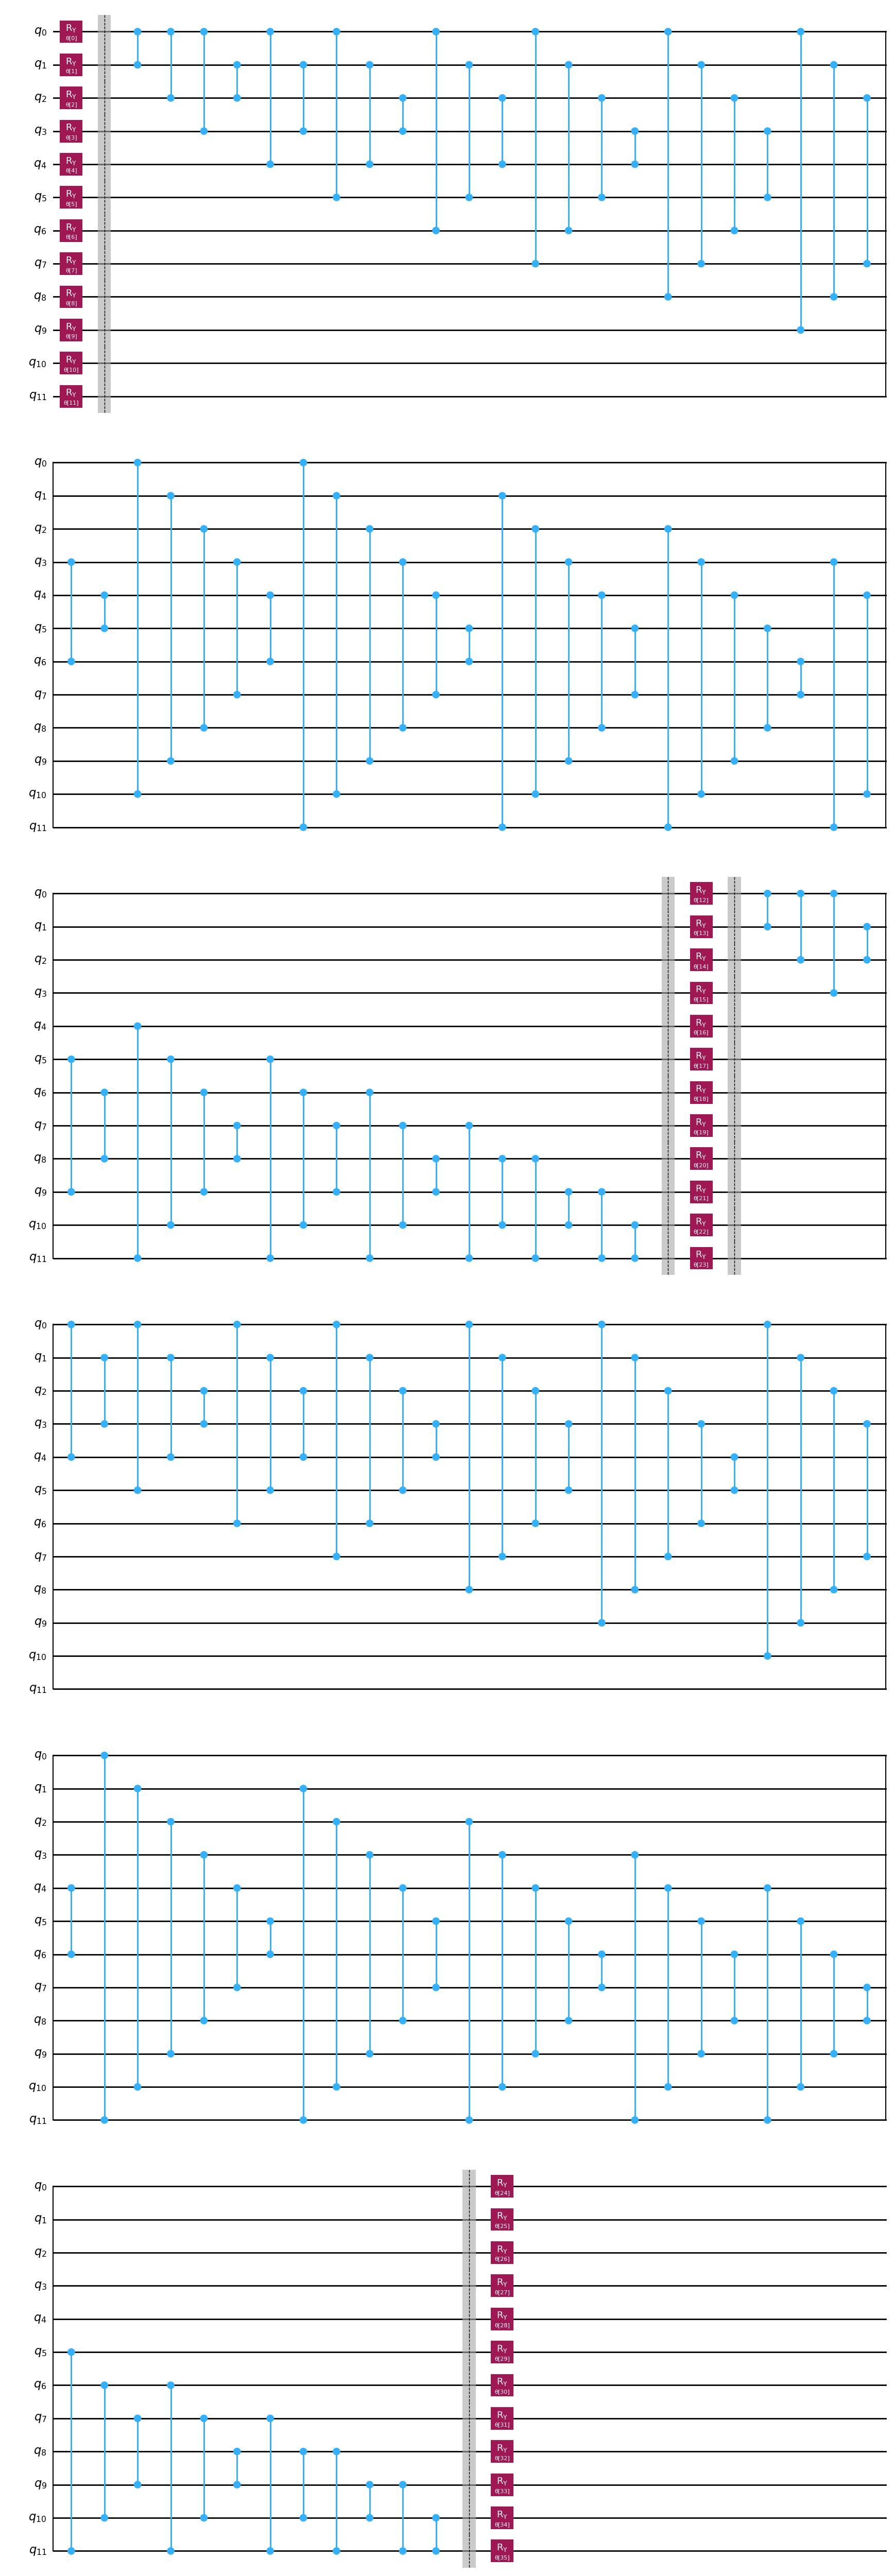

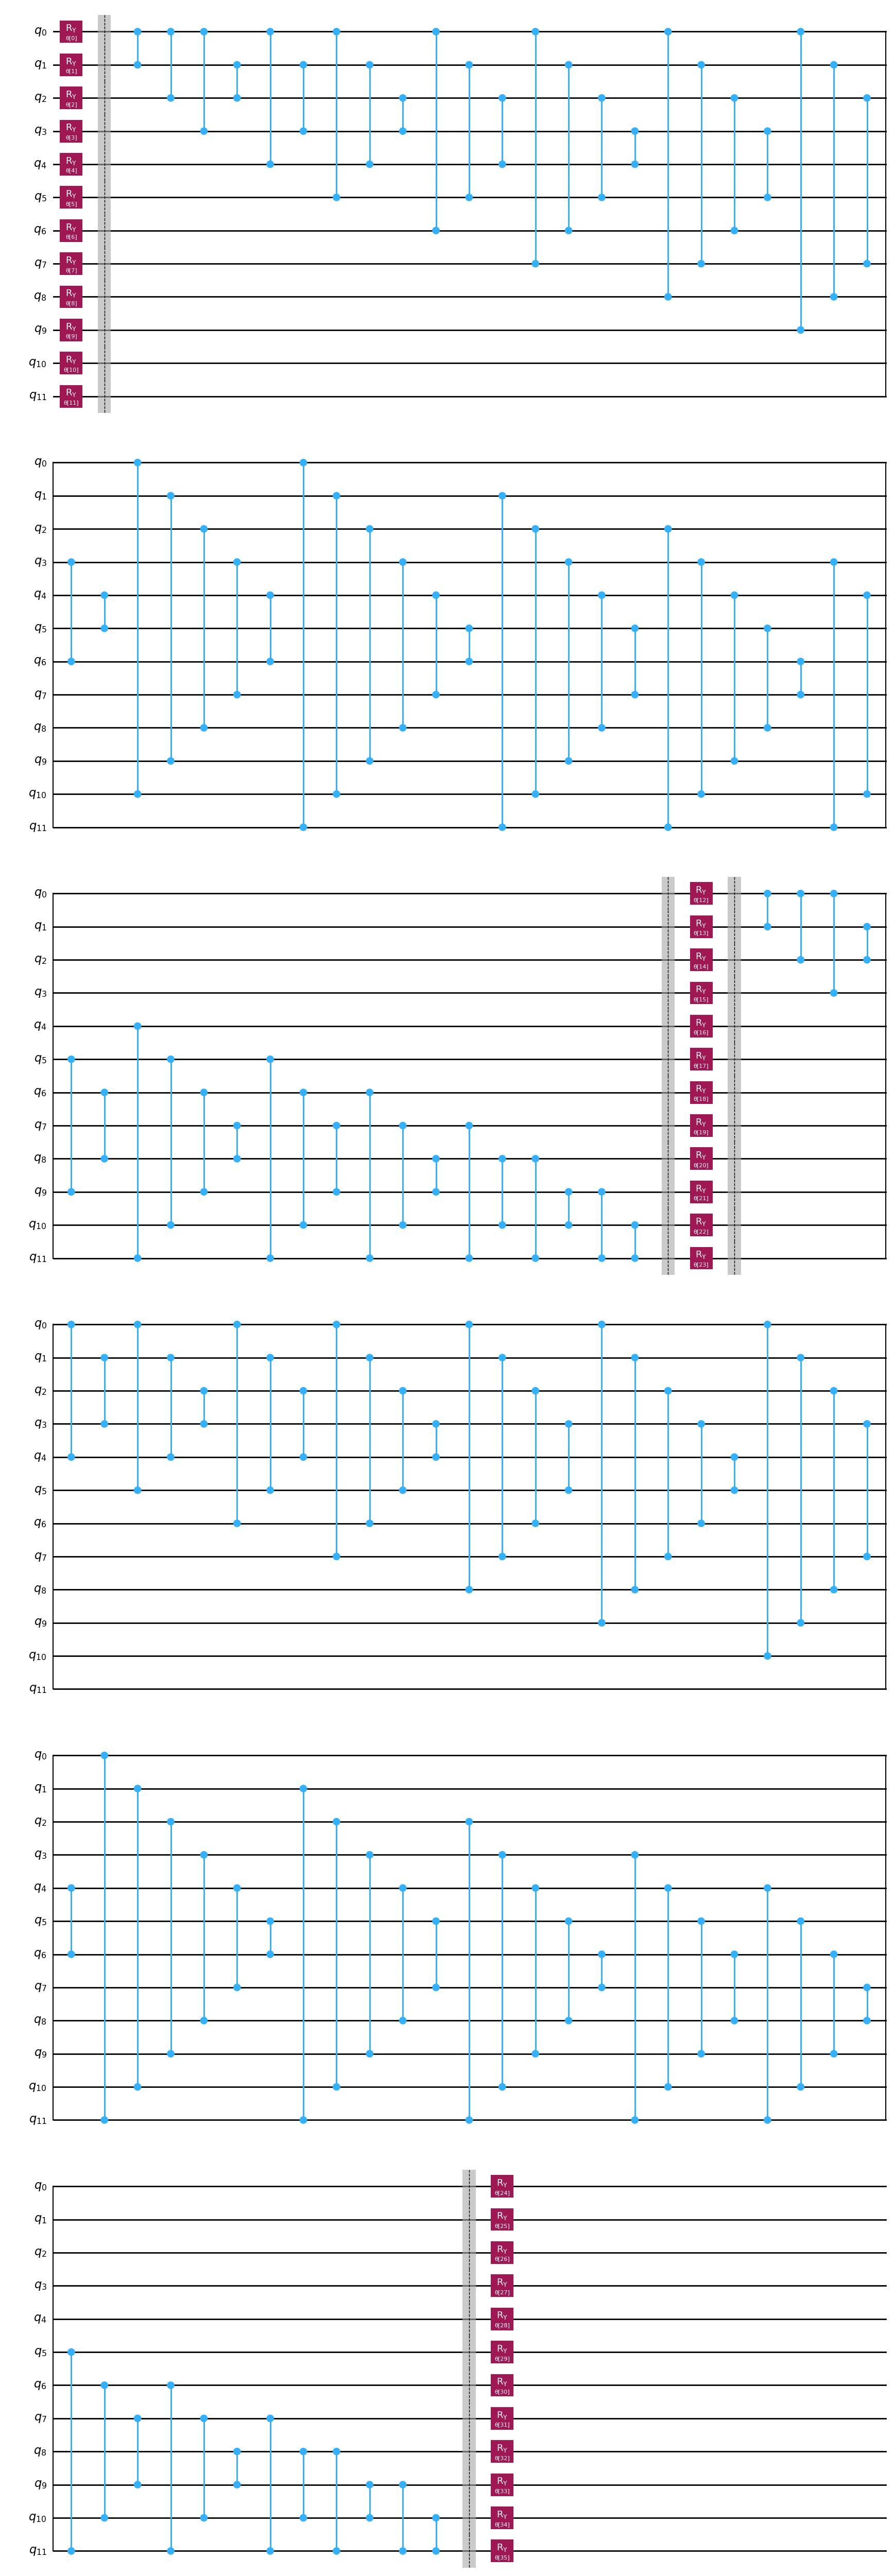

In [19]:
num_qubits = 12
ansatz = TwoLocal(num_qubits,'ry', 'cz','full',reps=2, insert_barriers=True)
ansatz.decompose().draw(output='mpl')

In [14]:
seed = 1000
initial=[random.uniform(0, 2*np.pi) for i in range(36)]
opt = SLSQP(maxiter=1000)
estimator=Estimator()
vqe = VQE(estimator, ansatz, optimizer=opt , initial_point=initial)  
result_TspHam= vqe.compute_minimum_eigenvalue(TspHam2)
print(result_TspHam) 


{   'aux_operators_evaluated': None,
    'cost_function_evals': 1729,
    'eigenvalue': np.float64(-54.99999988915441),
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x293a09d90>,
    'optimal_parameters': {   ParameterVectorElement(θ[5]): np.float64(5.029789167723223),
                              ParameterVectorElement(θ[7]): np.float64(1.5707919159707433),
                              ParameterVectorElement(θ[1]): np.float64(6.225779318510472),
                              ParameterVectorElement(θ[6]): np.float64(6.320799398263218),
                              ParameterVectorElement(θ[3]): np.float64(4.342476282261127),
                              ParameterVectorElement(θ[4]): np.float64(1.5707923163378197),
                              ParameterVectorElement(θ[2]): np.float64(4.712343437259833),
                              ParameterVectorElement(θ[0]): np.float64(3.0356080052194616),
                              ParameterVectorElemen

/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /opt/anaconda3/envs/quantum/lib/python3.12/site-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


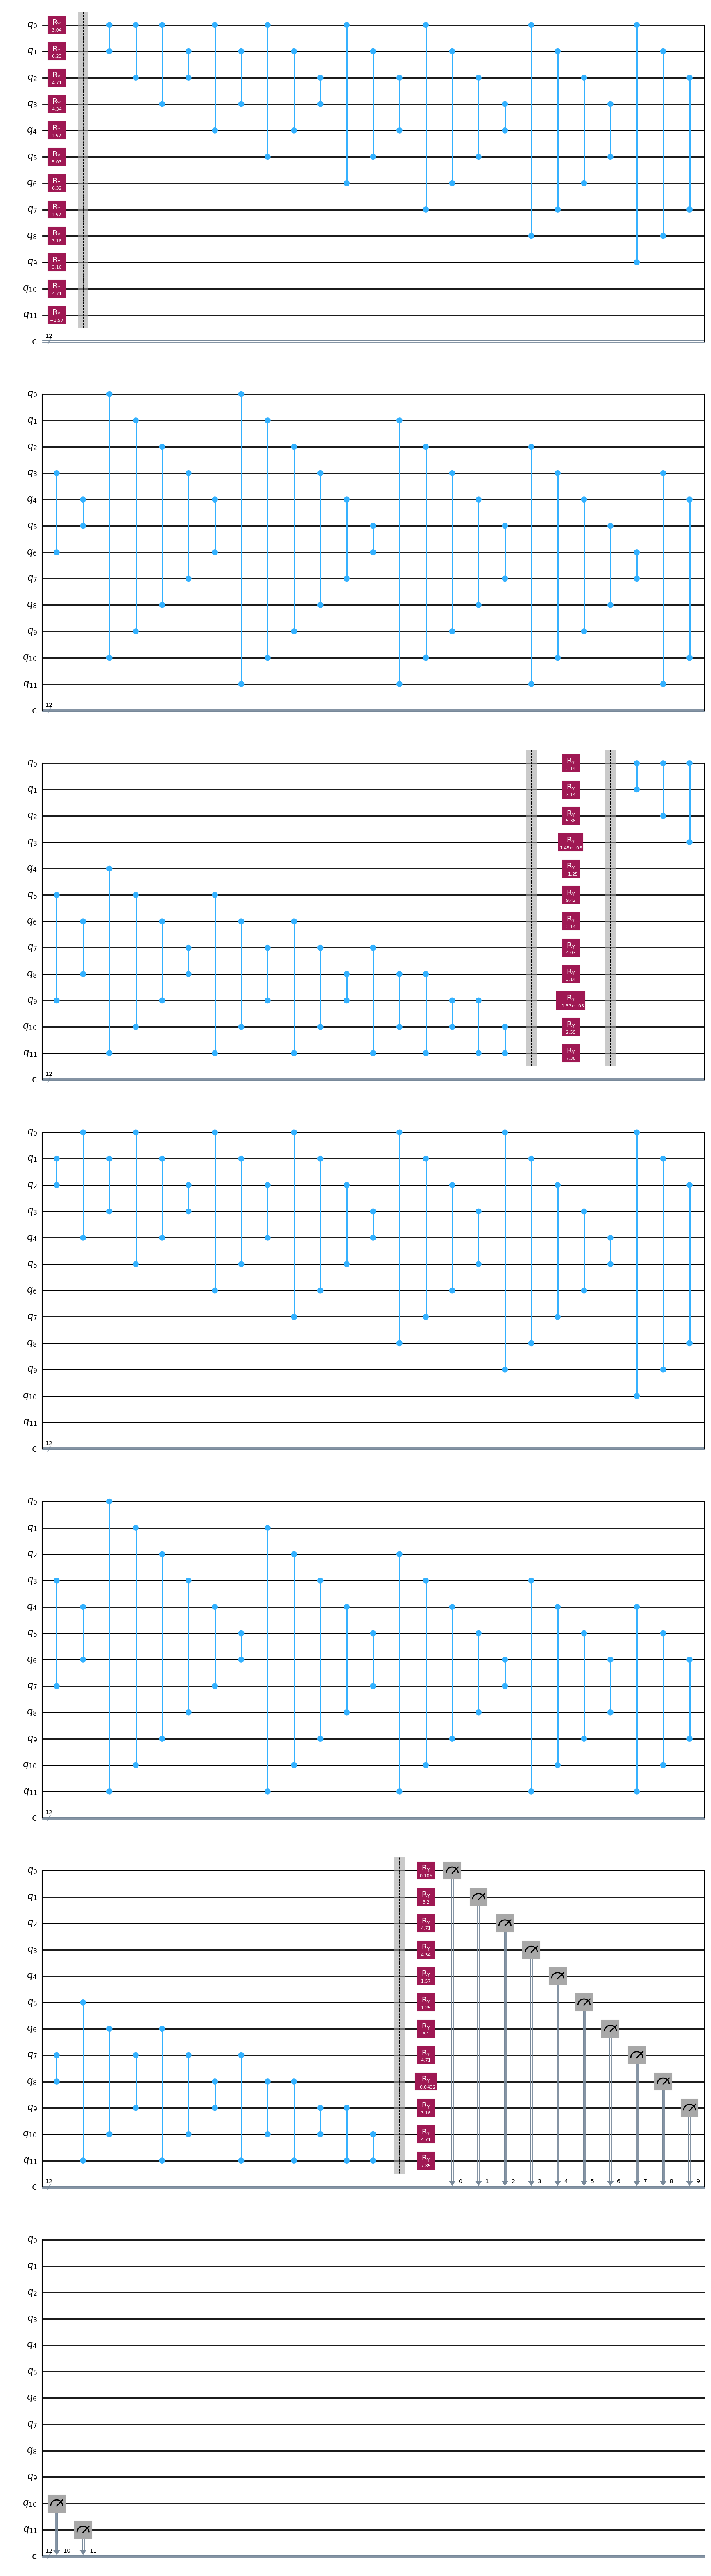

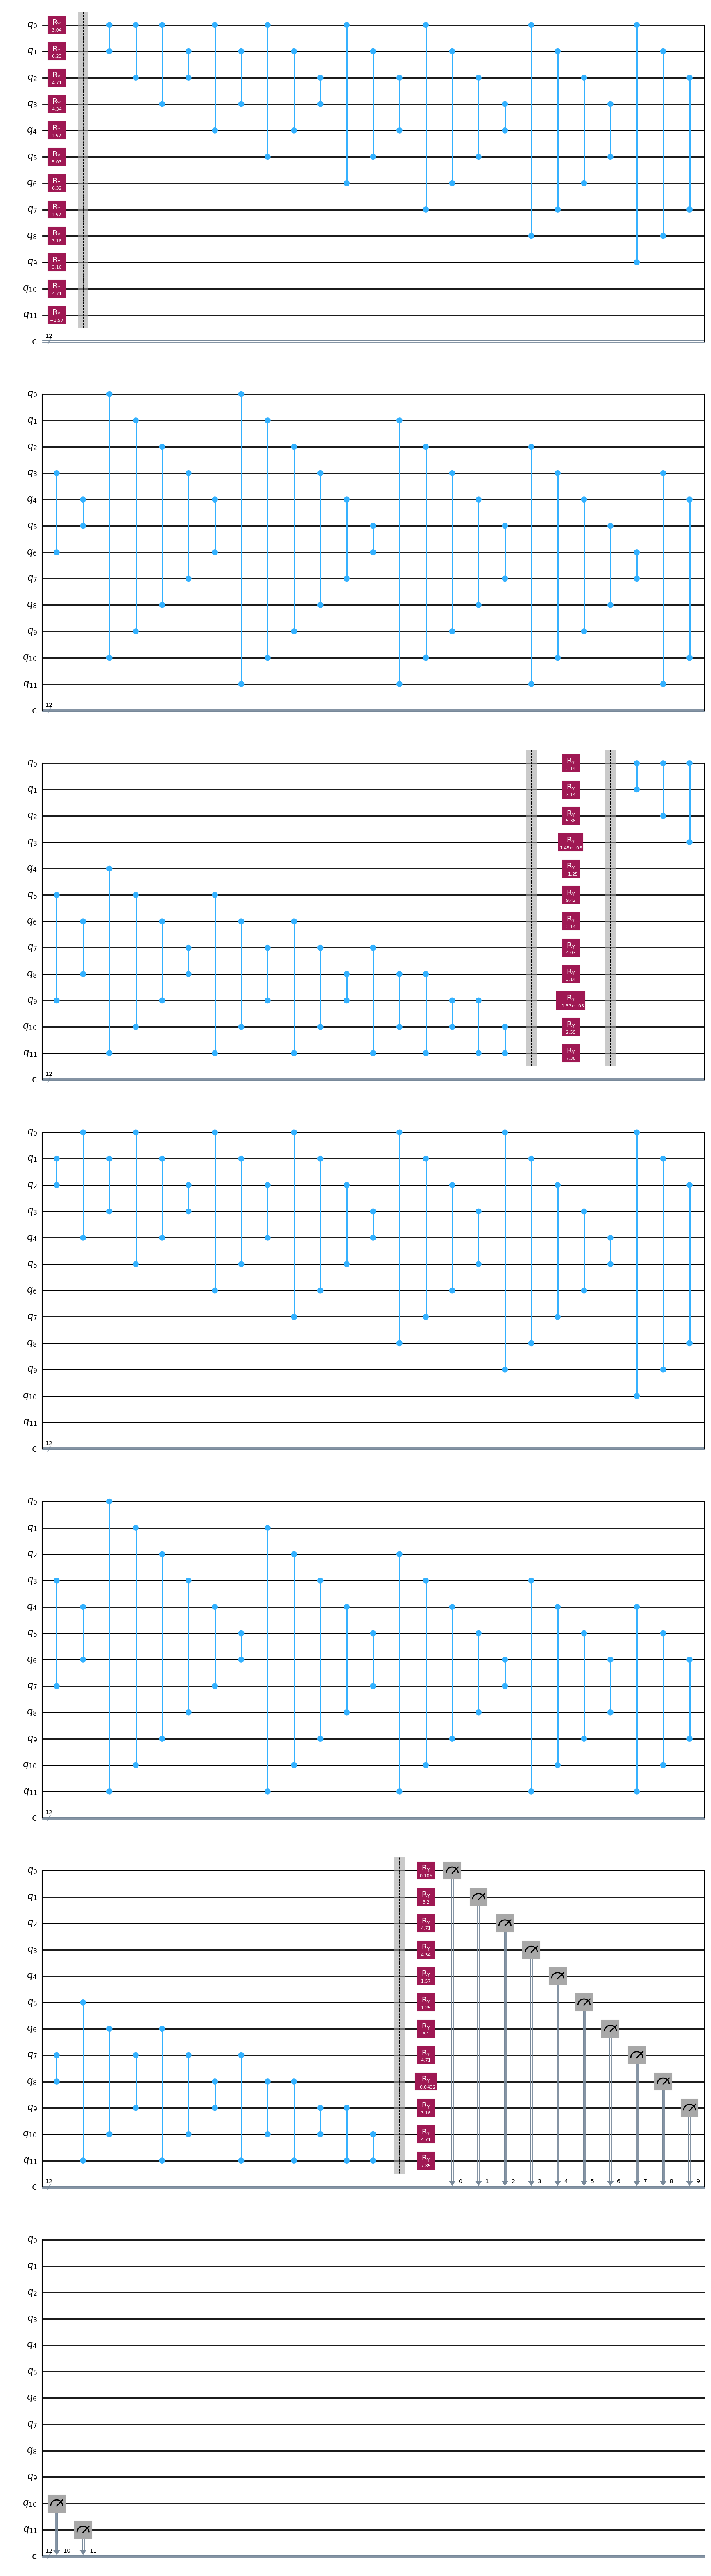

In [15]:
op=result_TspHam.optimal_point

qc=QuantumCircuit(num_qubits,num_qubits)
qc=qc.compose(ansatz.assign_parameters(op))

qc.measure(range(num_qubits),range(num_qubits))
qc.decompose().draw("mpl", style="iqx")

{'100010100000': 1024}


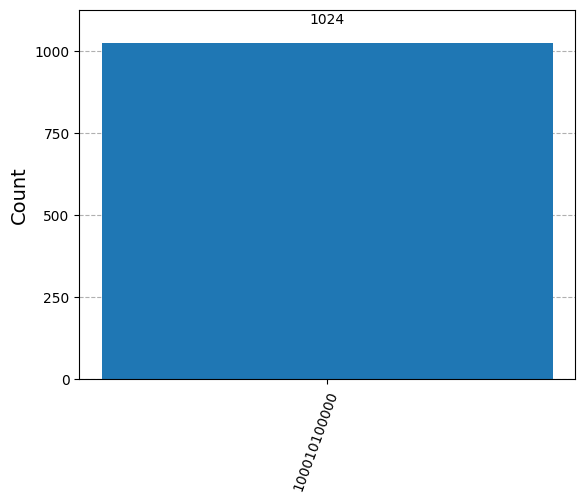

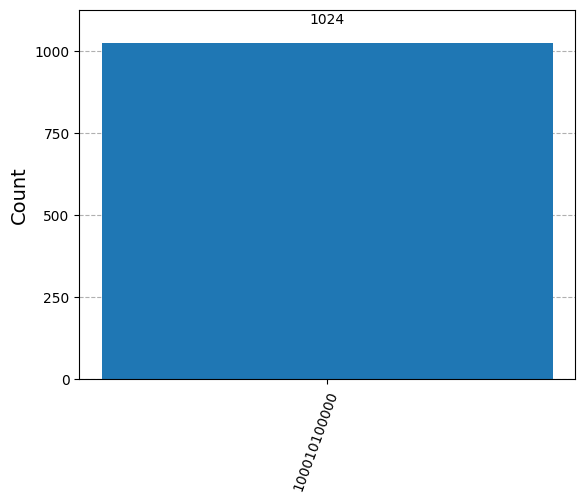

In [32]:
from qiskit.visualization import plot_histogram 
from qiskit_aer import Aer
from qiskit import transpile

simulator=Aer.get_backend('qasm_simulator')
circuit=transpile(qc,simulator)
job=simulator.run(circuit)

counts=job.result().get_counts()
print(counts)

plot_histogram(counts)

## Transforming a QUBO problem into an Ising Hamiltonian

In [35]:
from qiskit_optimization import QuadraticProgram 
from qiskit_optimization.translators import to_ising 
from qiskit_optimization.converters import QuadraticProgramToQubo

In [24]:
# Create an instance of QuadraticProgram
qp = QuadraticProgram()

# Add binary variables x1, x2, ..., x12
for i in range(6):
    qp.binary_var(f'x{i+1}')

# Define the objective function (replace d1, d2, ..., d12 with actual values)
d = [12, 14, 17, 15, 18, 29]  # Matrix of coefficients
objective = {f'x{i+1}': d[i] for i in range(6)}
qp.minimize(linear=objective)

# Add constraints  
qp.linear_constraint(linear={'x1':1,'x2':1,'x3':1,}, sense='==', rhs=2)
qp.linear_constraint(linear={'x1':1,'x4':1,'x5':1,}, sense='==', rhs=2)
qp.linear_constraint(linear={'x2':1,'x4':1,'x6':1,}, sense='==', rhs=2)
qp.linear_constraint(linear={'x3':1,'x5':1,'x6':1,}, sense='==', rhs=2)

qp.linear_constraint(linear={'x1':1,'x2':1}, sense='>=', rhs=1)
qp.linear_constraint(linear={'x1':1,'x3':1}, sense='>=', rhs=1)
qp.linear_constraint(linear={'x2':1,'x3':1}, sense='>=', rhs=1)
qp.linear_constraint(linear={'x4':1,'x5':1}, sense='>=', rhs=1)

# Convert the QuadraticProgram with constraints to a QUBO problem
qubo_problem = QuadraticProgramToQubo().convert(qp)

# Convert the QUBO problem to an Ising model
ising_h, offset = to_ising(qubo_problem)

print("Ising Hamiltonian:", ising_h)
print("Offset:", offset)

Ising Hamiltonian: SparsePauliOp(['IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII', 'IIIIZZ', 'IIIZIZ', 'IIZIIZ', 'IZIIIZ', 'IIIZZI', 'IIZIZI', 'ZIIIZI', 'IZIZII', 'ZIIZII', 'IZZIII', 'ZIZIII', 'ZZIIII'],
              coeffs=[1273. +0.j, 1272. +0.j, 1270.5+0.j, 1245. +0.j, 1243.5+0.j, 1211.5+0.j,
  639.5+0.j,  639.5+0.j,  613. +0.j,  613. +0.j,  639.5+0.j,  613. +0.j,
  613. +0.j,  613. +0.j,  613. +0.j,  639.5+0.j,  613. +0.j,  613. +0.j])
Offset: 5062.5


In [26]:
seed = 1000
initial=[random.uniform(0, 2*np.pi) for i in range(len(ising_h.coeffs))]
opt = SLSQP(maxiter=1000)
estimator=Estimator()
vqe = VQE(estimator, ansatz, optimizer=opt , initial_point=initial)  
result_TspHam= vqe.compute_minimum_eigenvalue(ising_h)
print(result_TspHam) 

{   'aux_operators_evaluated': None,
    'cost_function_evals': 768,
    'eigenvalue': np.float64(-4998.49999989616),
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x171608bc0>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): np.float64(5.460493878806699),
                              ParameterVectorElement(θ[1]): np.float64(7.8539813421969615),
                              ParameterVectorElement(θ[2]): np.float64(-1.5707977808458016),
                              ParameterVectorElement(θ[3]): np.float64(3.3923570127540117),
                              ParameterVectorElement(θ[4]): np.float64(4.712386963388972),
                              ParameterVectorElement(θ[5]): np.float64(7.853978103338344),
                              ParameterVectorElement(θ[6]): np.float64(2.9566406036410055e-07),
                              ParameterVectorElement(θ[7]): np.float64(0.5991343453530523),
                              ParameterVectorE

In [31]:
from qiskit.visualization import plot_histogram 
from qiskit_aer import Aer
from qiskit import transpile


op=result_TspHam.optimal_point

qc=QuantumCircuit(num_qubits,num_qubits)
qc=qc.compose(ansatz.assign_parameters(op))

qc.measure(range(num_qubits),range(num_qubits))

simulator=Aer.get_backend('qasm_simulator')
circuit=transpile(qc,simulator)
job=simulator.run(circuit)

counts=job.result().get_counts()
print(counts)

#plot_histogram(counts)

{'000000011110': 1024}
